In [1]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [2]:
#globally fixed the size of plot
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
tc=sns.load_dataset('titanic')
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#checking information of dataset
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
tc.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
tc=tc[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']]

In [8]:
tc.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [9]:
tc['age'].fillna(tc['age'].mean(), inplace=True)

In [10]:
tc.dropna(inplace=True)

In [11]:
tc.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [12]:
tc.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [13]:
x=tc[['sex', 'age', 'sibsp', 'parch', 'fare', 'pclass',
       'embarked']]
y=tc['survived']

In [14]:
#SPLITTING THE DATA INTO TRAINING AND TESTING
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((711, 7), (178, 7), (711,), (178,))

<Axes: xlabel='age', ylabel='Density'>

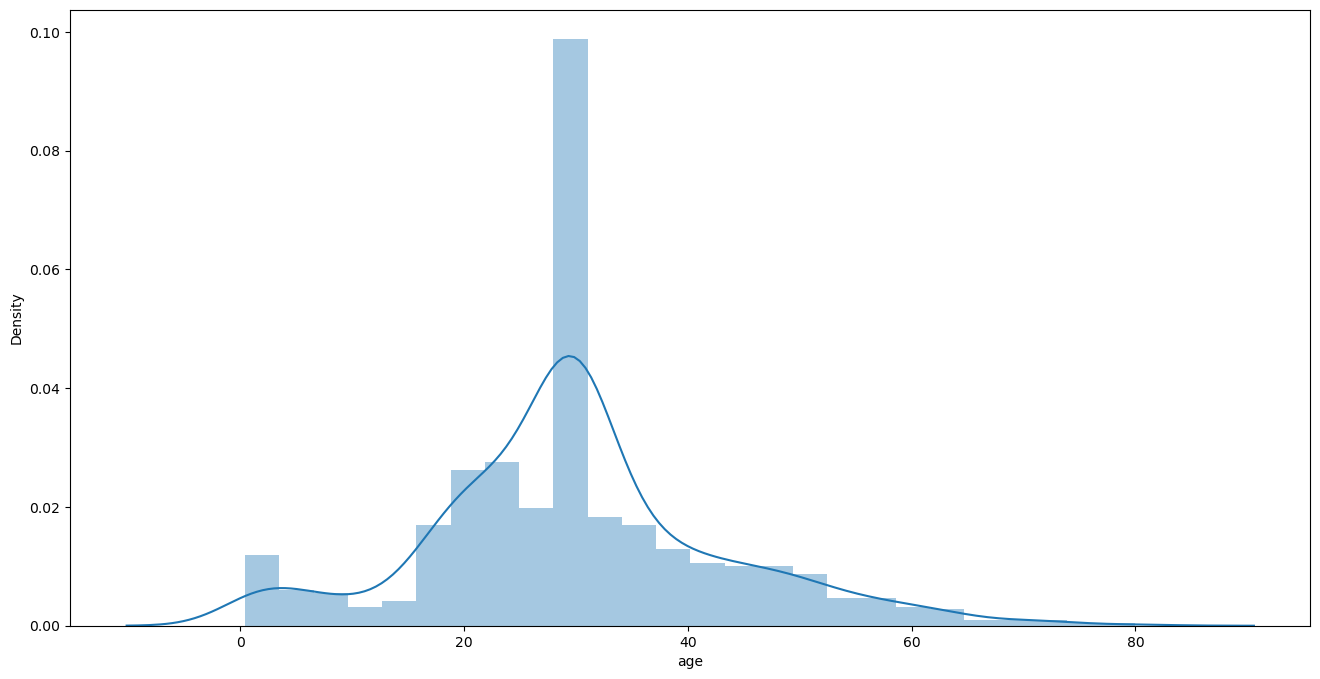

In [16]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(x_train['age'])    

<Axes: xlabel='fare', ylabel='Density'>

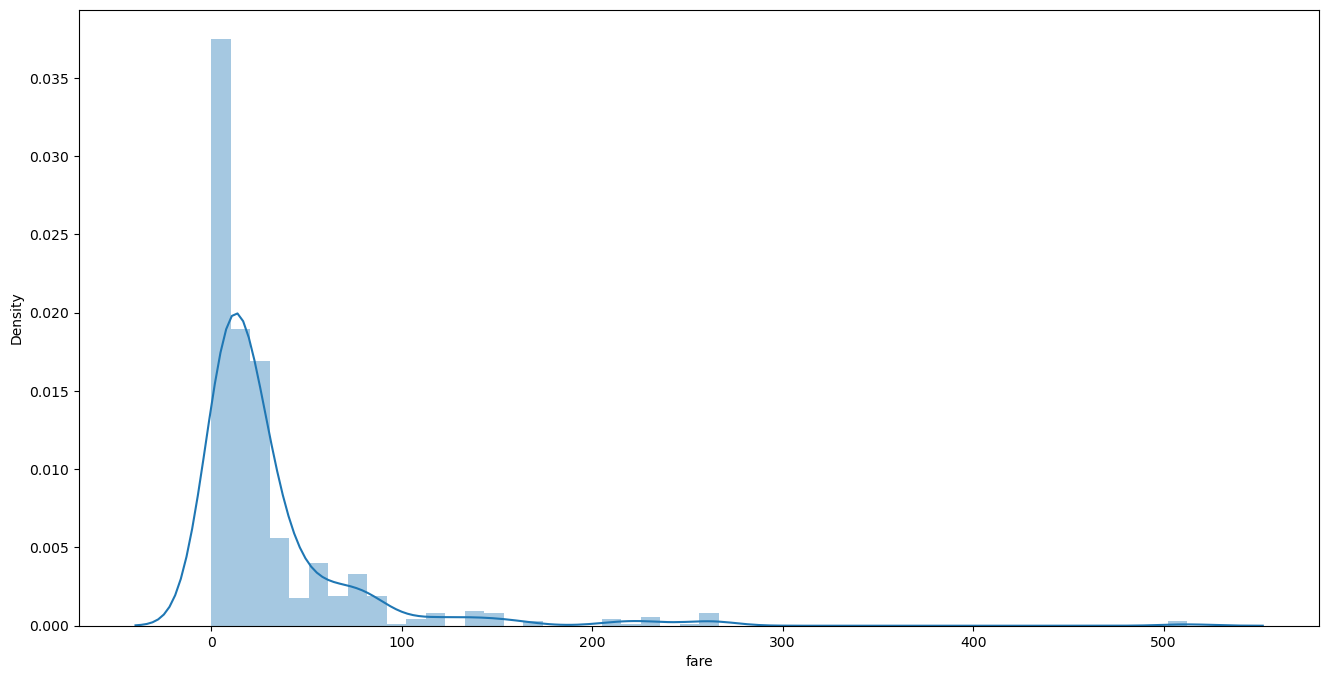

In [17]:
sns.distplot(x_train['fare'])

In [18]:
#feature scaling
age_scaler = StandardScaler()
fare_scaler = StandardScaler()

In [19]:
age_scaler.fit(pd.DataFrame(x_train['age']))  # Fit the scaler
x_train['age'] = age_scaler.transform(pd.DataFrame(x_train['age']))  # Transform the age column


<Axes: xlabel='age', ylabel='Density'>

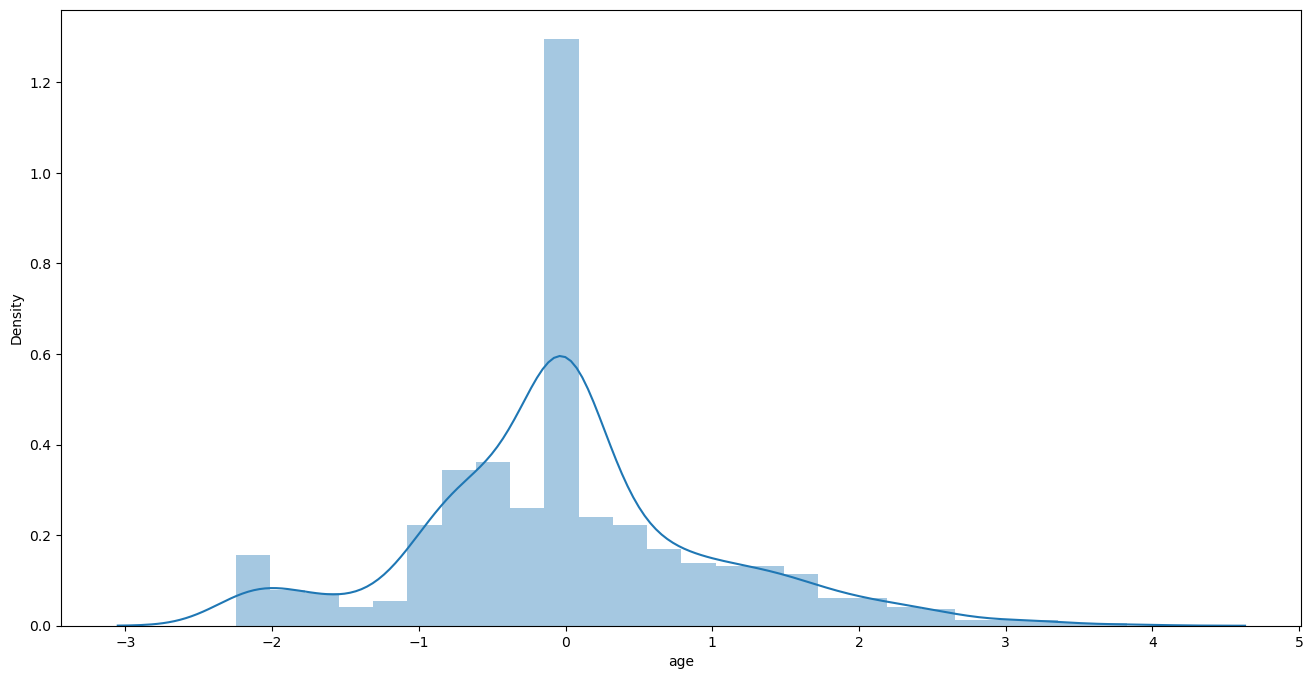

In [20]:
sns.distplot(x_train['age'])

In [21]:
fare_scaler=StandardScaler()
fare_scaler.fit(pd.DataFrame(x_train['fare']))

StandardScaler()

In [22]:
x_train['fare']=fare_scaler.transform(x_train[['fare']])

<Axes: xlabel='fare', ylabel='Density'>

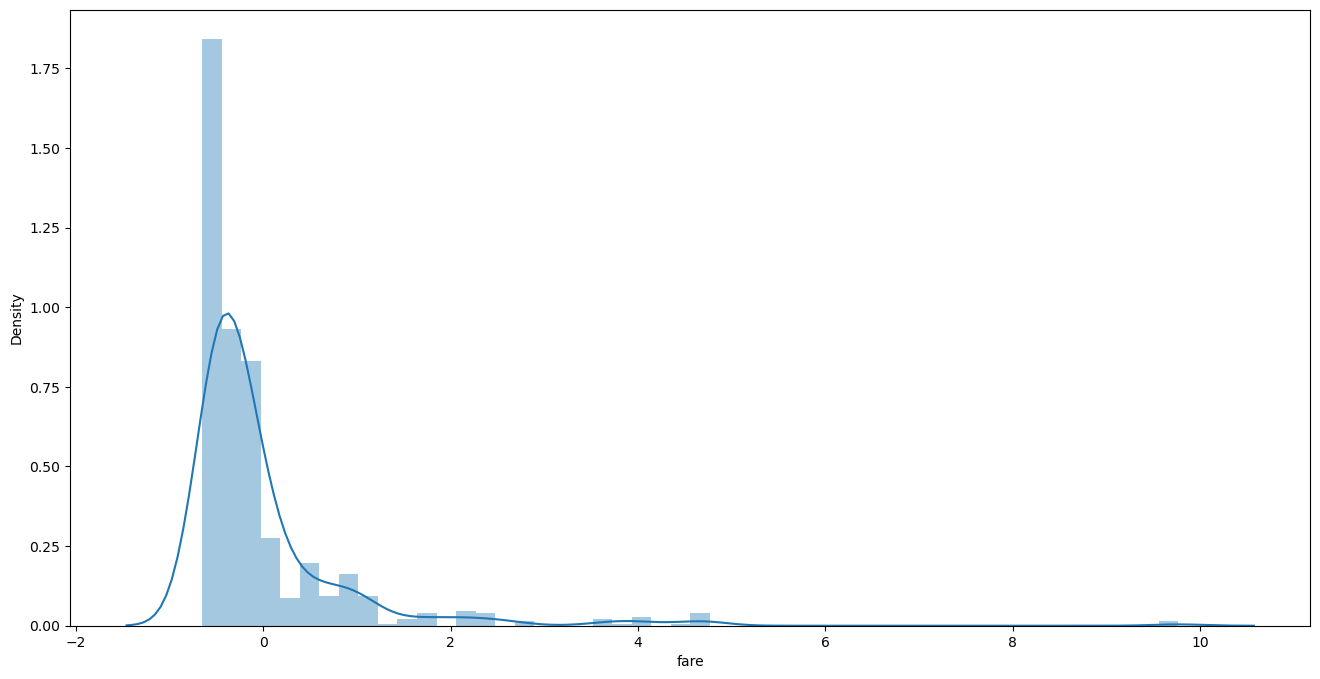

In [23]:
sns.distplot(x_train['fare'])

In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    object 
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.4+ KB


In [25]:
sex_encoder = LabelEncoder()
sex_encoder.fit(pd.DataFrame(x_train['sex']))

LabelEncoder()

In [26]:
x_train['sex']=sex_encoder.transform(x_train['sex'])

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    int32  
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 41.7+ KB


In [28]:
embarked_encoder = LabelEncoder()
embarked_encoder.fit(pd.DataFrame(x_train['embarked']))

LabelEncoder()

In [29]:
x_train['embarked']=embarked_encoder.transform(x_train['embarked'])

In [30]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 708 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    int32  
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   pclass    711 non-null    int64  
 6   embarked  711 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 38.9 KB


In [31]:
#checking of the corelation of the features

<Axes: >

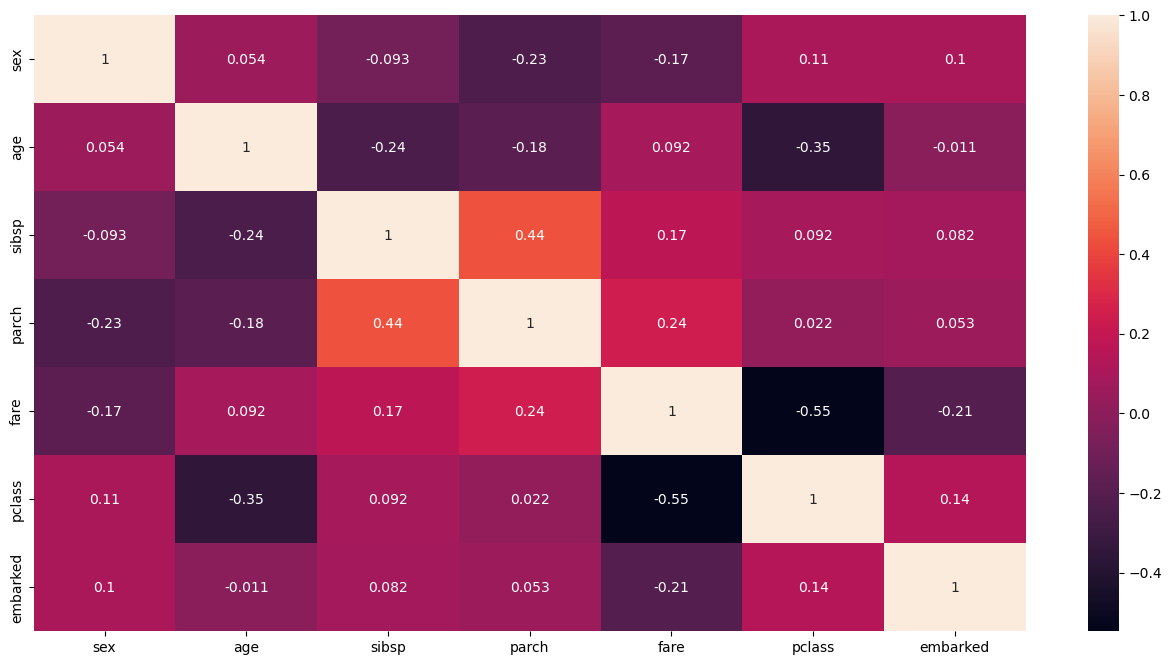

In [32]:
sns.heatmap(x_train.corr(), annot=True)

In [33]:
#delete the features pclass bcause it shaowing negative corelation with the fare
del x_train['pclass']

In [34]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 711 entries, 708 to 103
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       711 non-null    int32  
 1   age       711 non-null    float64
 2   sibsp     711 non-null    int64  
 3   parch     711 non-null    int64  
 4   fare      711 non-null    float64
 5   embarked  711 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 33.3 KB


In [35]:
x_train_original=x_train.copy()
x_train=x_train.values
y_train=y_train.values

In [36]:
x_train_original.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [37]:
log_reg=LogisticRegression()

In [38]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [39]:
#checking of the cofficient and intercept
cofficient=pd.concat([pd.DataFrame(x_train_original.columns), pd.DataFrame(np.transpose(log_reg.coef_))], axis=1)

In [40]:
cofficient

,0,0
0,sex,-2.503075
1,age,-0.299958
2,sibsp,-0.426579
3,parch,-0.193825
4,fare,0.742928
5,embarked,-0.258051


In [41]:
cofficient.columns=['features', 'cofficient']

In [42]:
cofficient

,features,cofficient
0,sex,-2.503075
1,age,-0.299958
2,sibsp,-0.426579
3,parch,-0.193825
4,fare,0.742928
5,embarked,-0.258051


In [43]:
cofficient=cofficient.append({'features':'intercept', 'cofficient':log_reg.intercept_[0]}, ignore_index=True)

In [44]:
cofficient

,features,cofficient
0,sex,-2.503075
1,age,-0.299958
2,sibsp,-0.426579
3,parch,-0.193825
4,fare,0.742928
5,embarked,-0.258051
6,intercept,1.806453


In [45]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 281 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       178 non-null    object 
 1   age       178 non-null    float64
 2   sibsp     178 non-null    int64  
 3   parch     178 non-null    int64  
 4   fare      178 non-null    float64
 5   pclass    178 non-null    int64  
 6   embarked  178 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.1+ KB


In [46]:
## Make a scalling and tranform of X_test data

In [47]:
x_test.head(2)

,sex,age,sibsp,parch,fare,pclass,embarked
281,male,28.0,0,0,7.8542,3,S
435,female,14.0,1,2,120.0000,1,S


In [48]:
def transform_test_data(test_data, sex_encoder, age_scaler, fare_scaler, embarked_encoder):
    # Transform the 'sex' column
    test_data['sex'] = sex_encoder.transform(test_data['sex'])
    
    # Transform the 'age' column (ensure it's 2D for scalers)
    test_data['age'] = age_scaler.transform(test_data[['age']])
    
    # Transform the 'fare' column (ensure it's 2D for scalers)
    test_data['fare'] = fare_scaler.transform(test_data[['fare']])
    
    # Transform the 'embarked' column
    test_data['embarked'] = embarked_encoder.transform(test_data['embarked'])
    
    # Drop 'pclass' if not required
    test_data.drop(columns=['pclass'], inplace=True)
    
    return test_data



In [49]:
x_Test = transform_test_data(x_test, sex_encoder, age_scaler, fare_scaler, embarked_encoder)


In [50]:
x_test.head()       

,sex,age,sibsp,parch,fare,embarked
281,1,-0.142075,0,0,-0.492389,2
435,0,-1.209717,1,2,1.788823,2
39,0,-1.209717,1,0,-0.423482,0
418,1,0.010446,0,0,-0.387716,2
585,0,-0.904676,0,2,0.968044,2


In [51]:
y_pred=log_reg.predict(x_test)

In [52]:
print('Accuracy:', accuracy_score(y_test, y_pred)*100)

Accuracy: 79.21348314606742


In [53]:
x_test=x_test.values
y_test=y_test.values

In [54]:
y_pred=log_reg.predict(x_test)  

In [55]:
print(confusion_matrix(y_test, y_pred))

[[90 19]
 [18 51]]
